**(LATEST MODEL)
MODEL TO GET COACHES BEST SUITED FOR GRADE JUMPS IN SET YEARS**

Mean Squared Error: 6.006888974212947
             CoachName  GradeChangePerYear  ExpectedGrade  \
21      Raemon Sluiter           -3.389235       1.221531   
20     Philippe Dehaes           -4.626080       1.000000   
19           Pere Riba           -7.284404       1.000000   
18       Nikola Horvat          -17.125204       1.000000   
22           Sam Sumyk           -2.674240       2.651520   
24    Sergey Demekhine           -1.880723       4.238553   
23        Sascha Bajin           -2.208363       3.583274   
27    Thomas Johansson           -1.301459       5.397083   
26     Thomas Högstedt           -1.450363       5.099274   
25       Stas Khmarsky           -1.637743       4.724514   
32        Zdeněk Kubík           -0.859994       6.280013   
30   Vladimír Pláteník           -0.994998       6.010004   
29  Tomasz Wiktorowski           -1.079749       5.840502   
28            Tom Hill           -1.180282       5.639435   
31        Wim Fissette           -0.922583     

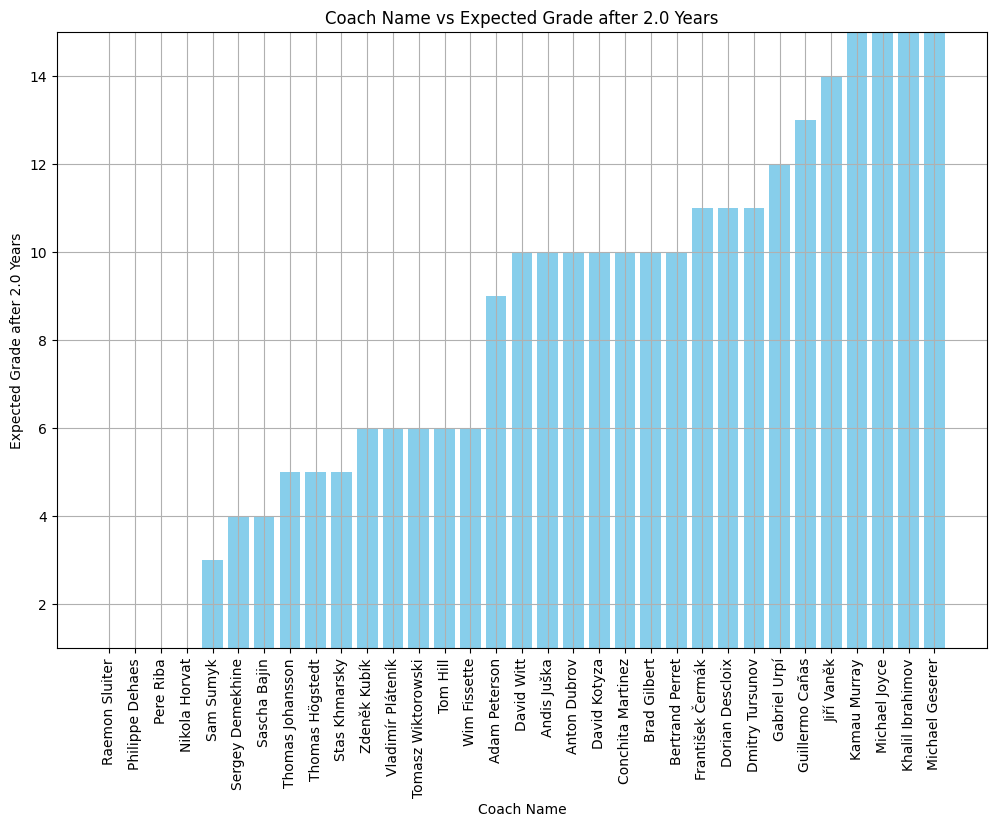

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/Final_Cleaned_Dataset-X.csv")
df2 = pd.read_csv("/content/WTA Earning Database - Sheet1.csv")

grade_earn = {1: 2811484, 2: 1614396, 3: 1614396, 4: 888169, 5: 731739, 6: 614339, 7: 564318, 8: 521465, 9: 483610, 10: 447755, 11:252676, 12:97257, 13:37352, 14:17304, 15:11738}

label_encoder = LabelEncoder()
df['CoachName'] = label_encoder.fit_transform(df['CoachName'])

#Target variables X and Y
X = df[['CoachName', 'PlayerAge', 'GradeBefore', 'GradeAfter']]
y = df['year']

#weights
d = {1: 119.7230167, 2: 50.25333304, 3: 23.54361386, 4: 15.31467093, 5: 9.569901842, 6: 4.596578734, 7: 1.994138807, 8: 0.8742711254, 9: 0.4317312375, 10: 0.2624243092, 11: 0.180601682, 12: 0.1298467761, 13: 0.09541922307, 14: 0.0714, 15: 0.05}

def custom_weight_func(grades, weight_dict):
    weights = [weight_dict.get(grade, 0) for grade in grades]
    return weights

df['Weight'] = custom_weight_func(df['GradeBefore'], d)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train, sample_weight=df.loc[X_train.index]['Weight'])

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

#our desired inputs
player_age = 25
grade_before = 8
time_duration = 2.0

predictions_data = []

coaches = label_encoder.classes_

# Looping through each coach
for coach in coaches:
    # (coach is encoded check)
    if coach not in label_encoder.classes_:
        new_classes = list(label_encoder.classes_)
        new_classes.append(coach)
        label_encoder.classes_ = np.array(new_classes)

    coach_encoded = label_encoder.transform([coach])[0]
    new_data = pd.DataFrame({'CoachName': [coach_encoded],
                             'PlayerAge': [player_age],
                             'GradeBefore': [grade_before],
                             'GradeAfter': [grade_before + 1]})

    predicted_years = model.predict(new_data)[0]
    grade_change_per_year = 1 / predicted_years

    expected_grade = grade_before + grade_change_per_year * time_duration

    # expected grade must be in our earning and ranking grade range(1-10)
    expected_grade = min(max(expected_grade, 1), 15)

    #rounding the result to nearest integer
    expected_grade_rounded = round(expected_grade)

    predictions_data.append({
        'CoachName': coach,
        'GradeChangePerYear': grade_change_per_year,
        'ExpectedGrade': expected_grade,
        'ExpectedGradeRounded': expected_grade_rounded,
        'ExpectedIncome': grade_earn.get(expected_grade_rounded, 0)
    })

predictions_df = pd.DataFrame(predictions_data)

# Sorting the DataFrame based on the expected grade, with the best (lowest value) grades first
sorted_predictions_df = predictions_df.sort_values(by='ExpectedGradeRounded')

print(sorted_predictions_df)

plt.figure(figsize=(12, 8))
plt.bar(sorted_predictions_df['CoachName'], sorted_predictions_df['ExpectedGradeRounded'], color='skyblue')
plt.xlabel('Coach Name')
plt.ylabel(f'Expected Grade after {time_duration} Years')
plt.title(f'Coach Name vs Expected Grade after {time_duration} Years')
plt.ylim(1, 15)  #1-15 range
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


**(old model)
MODEL TO GET COACHES BEST SUITED FOR DESIRED GRADE CHANGE IN SET TIME**

Mean Squared Error: 6.006888974212946
Enter the player's current age: 23
Enter the player's current grade: 10
Enter the desired grade: 3
Enter the time duration in years: 2
             CoachName  StartingAge  GradeBefore  final_grade  IncomeBefore  \
32        Zdeněk Kubík           23           10            3         18355   
31        Wim Fissette           23           10            3         18355   
30   Vladimír Pláteník           23           10            3         18355   
29  Tomasz Wiktorowski           23           10            3         18355   
28            Tom Hill           23           10            3         18355   
27    Thomas Johansson           23           10            3         18355   
26     Thomas Högstedt           23           10            3         18355   
25       Stas Khmarsky           23           10            3         18355   
24    Sergey Demekhine           23           10            3         18355   
23        Sascha Bajin           23  

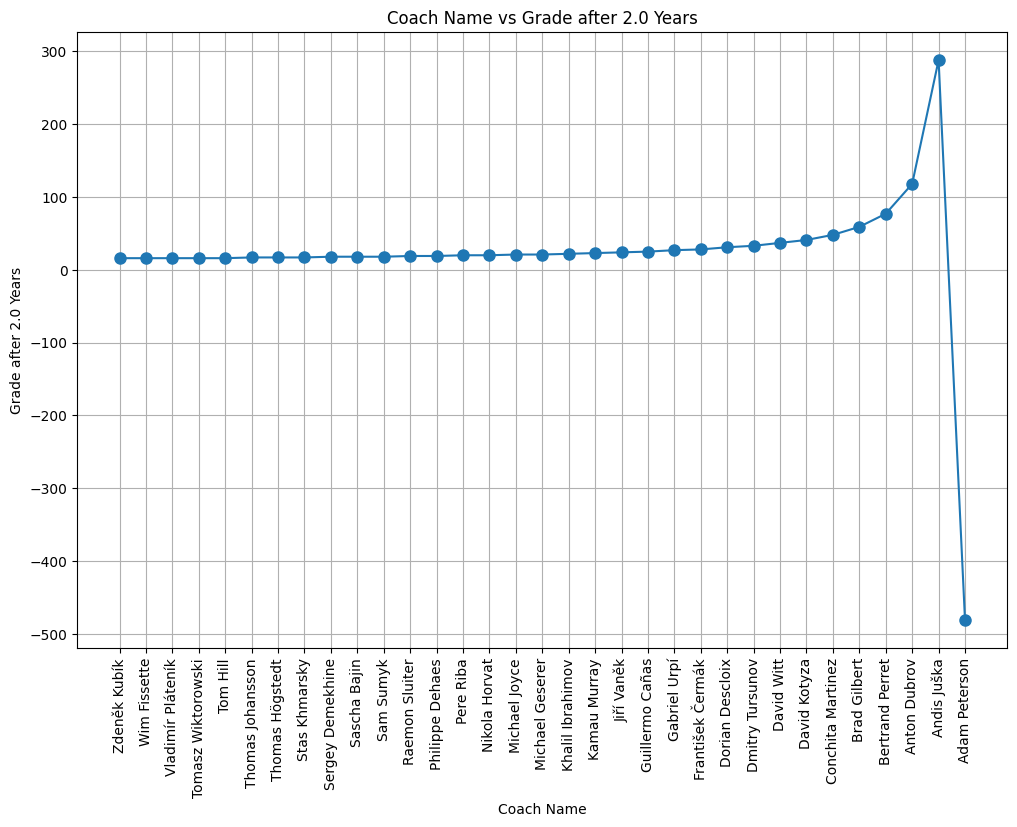

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/Final_Cleaned_Dataset-X.csv")
df2 = pd.read_csv("/content/WTA earning Database - Sheet1.csv")

#old grade earning slabs
grade_earn = {1:8373904, 2:3514918, 3:1646734, 4:1071169, 5:669357, 6:321503, 7:139478, 8:61150, 9:30197, 10:18355, 11:12632, 12:9082, 13:6674, 14:4994}

label_encoder = LabelEncoder()
df['CoachName'] = label_encoder.fit_transform(df['CoachName'])

X = df[['CoachName', 'PlayerAge', 'GradeBefore', 'GradeAfter']]
y = df['year']

d = {1:119.7230167, 2:50.25333304, 3:23.54361386, 4:15.31467093, 5:9.569901842, 6:4.596578734, 7:1.994138807, 8:0.8742711254, 9:0.4317312375, 10:0.2624243092, 11:0.180601682, 12:0.1298467761, 13:0.09541922307, 14:0.0714, 15:0.05}

def custom_weight_func(grades, weight_dict):
    weights = [weight_dict.get(grade, 0) for grade in grades]
    return weights

df['Weight'] = custom_weight_func(df['GradeBefore'], d)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train, sample_weight=df.loc[X_train.index]['Weight'])

predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

#our inputs
player_age = int(input("Enter the player's current age: "))
grade_before = int(input("Enter the player's current grade: "))
desired_grade = int(input("Enter the desired grade: "))
time_duration = float(input("Enter the time duration in years: "))

predictions_data = []

coaches = label_encoder.classes_

# Loop through each coach in the list
for coach in coaches:
    # (checking if coaches are encoded)
    if coach not in label_encoder.classes_:
        new_classes = list(label_encoder.classes_)
        new_classes.append(coach)
        label_encoder.classes_ = np.array(new_classes)

    coach_encoded = label_encoder.transform([coach])[0]
    new_data = pd.DataFrame({'CoachName': [coach_encoded],
                             'PlayerAge': [player_age],
                             'GradeBefore': [grade_before],
                             'GradeAfter': [desired_grade]})

    predicted_years = model.predict(new_data)[0]

    if predicted_years <= time_duration:
        round_value = desired_grade

        change_in_income = grade_earn.get(round_value, 0) - grade_earn.get(grade_before, 0)
        twenty_percent_of_income_after = 0.2 * grade_earn.get(round_value, 0)

        predictions_data.append({
            'CoachName': coach,
            'StartingAge': player_age,
            'GradeBefore': grade_before,
            'final_grade': desired_grade,
            'IncomeBefore': grade_earn.get(grade_before, 0),
            'IncomeAfter': grade_earn.get(round_value, 0),
            'ChangeInIncome': change_in_income,
            'TwentyPercentOfIncomeAfter': twenty_percent_of_income_after,
            'year': predicted_years,
            'grade_change_per_year': (desired_grade - grade_before) / predicted_years,
            'after_time_duration': grade_before + ((desired_grade - grade_before) / predicted_years) * time_duration,
            'after_time_duration_round': round(grade_before + ((desired_grade - grade_before) / predicted_years) * time_duration),
            'after_time_duration_income': grade_earn.get(round(grade_before + ((desired_grade - grade_before) / predicted_years) * time_duration), 0),
            'twenty_perc_after_time_duration_income': 0.2 * grade_earn.get(round(grade_before + ((desired_grade - grade_before) / predicted_years) * time_duration), 0)
        })

predictions_df = pd.DataFrame(predictions_data)

sorted_predictions_df = predictions_df.sort_values(by='year')

print(sorted_predictions_df)

plt.figure(figsize=(12, 8))
plt.plot(sorted_predictions_df['CoachName'], sorted_predictions_df['after_time_duration_round'], marker='o', markersize=8, linestyle='-')
plt.xlabel('Coach Name')
plt.ylabel(f'Grade after {time_duration} Years')
plt.title(f'Coach Name vs Grade after {time_duration} Years')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()
